
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**
---


Integrantes:
*   Candelaria Arpajou: mcarpajou@santafe-conicet.gov.ar
*   Hugo Folonier: hugofolonier@gmail.com
*   Gustavo Jaca: gustavojaca@gmail.com

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import plotly.express as px
from pandas.core.frame import DataFrame
from matplotlib import ticker as tick

seaborn.set_context('talk')


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df_original = pd.read_csv(url)
df_copia = df_original.copy() #Copia del DataSet original
df_copia[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.



### 1. Selección de las columnas relevantes para analizar.

In [ ]:
# Listado de todas las columnas presentes
df_copia.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

In [ ]:
df_copia.tools_programming_languages

0                                                 Ninguno
1                                HTML, Javascript, Python
2                                                 Ninguno
3       Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4                  CSS, HTML, Javascript, SQL, TypeScript
                              ...                        
6090    .NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...
6091                            Ninguno de los anteriores
6092                            Ninguno de los anteriores
6093     C, C++, HTML, Java, Javascript, PHP, Python, SQL
6094                            Ninguno de los anteriores
Name: tools_programming_languages, Length: 6095, dtype: object

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO','salary_monthly_BRUTO','profile_age']

A la hora de efectuar el análisis se incorporan las columnas de 'profile_age' y 'salary_monthly_BRUTO'. De esta manera, se busca responder la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?** considerando los siguientes aspectos:
- Edad de los programadores: se establece un rango etario entre 18 y 65 años. La cota inferior representa la edad con la que se obtiene la moyoría de edad en nuestro país. La persona ya puede, a partir de ese momento, tener un empleo formal, realizar aportes jubilatorios, etc. La cota superior representa la edad a partir de la cual los hombres ya pueden jubilarse. En el caso de las mujeres, este número es menor (60 años). Sin embargo, en el dataset no hay mujeres programadoras mayores a 60 años. En ralación a otros géneros, no se encontró información relevante referida a su edad jubilatoria. Por estas razones, se toma la edad de 65 años como límite superior. 
- Cociente salario NETO y salario BRUTO: se fija una relación salario neto - salario bruto de entre 0.6 y 1. Como ya es sabido, el salario neto no puede superar al bruto, razón por la cual la cota superior es 1. Por su parte, la cota inferior se establece en base a lo observado en la distribución de valores de la variable cociente Neto-Bruto.

In [ ]:
df_copia['profile_gender'].unique()

array(['Mujer', 'Hombre', 'Otros'], dtype=object)

In [ ]:
len(df_copia[(df_copia['profile_gender'] == 'Mujer') & (df_copia['profile_age'] > 60)]) # No hay mujeres programadoras mayores de 60 años

0

In [ ]:
df_copia[(df_copia['profile_gender'] == 'Otros') & (df_copia['profile_age'] > 60)] # Solo una persona no binaria tiene más de 60 años

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
4099,Otros,64,Argentina,Ciudad Autónoma de Buenos Aires,30.0,15.0,10.0,150,Doctorado,Completado,...,Jamás,¿Qué les importa?,Mental,No,51-100,Producto basado en Software,9,10,"Abono de celular, Abono de Internet, Capacitac...",NaN


### 2. Eliminación de outliers


A continuación, se eliminan los outliers de las columnas seleccionadas. Seguidamente, se procede a elegir los lenguajes de programación más populares. Esta metodología permite seleccionar los lenguajes más populares provenientes de un DataFrame limpio, sin anomalías. Se evidenció durante la realización del práctico que si se procedía de manera inversa, es decir, en primer lugar elegir los lenguajes más populares para después eliminar anomalías, luego de esto último, los lenguajes más populares no eran los mismos que los determinados inicialmente. 

#### Eliminación de outliers en 'salary_monthly_NETO'

In [ ]:
min_salary_monthly_neto = df_copia['salary_monthly_NETO'].min()
max_salary_monthly_neto = df_copia['salary_monthly_NETO'].max()
print(f'El salario NETO mínimo de los programadores es {min_salary_monthly_neto}, mientras que el máximo es {max_salary_monthly_neto}')

El salario NETO mínimo de los programadores es 1.0, mientras que el máximo es 2080000.0


Identificación de valores nulos en la columna de salario NETO

In [ ]:
df_copia['salary_monthly_NETO'].isnull().values.any() # Hay valores nulos

True

Se procede a eliminar anomalías estableciendo un límite superior igual al percentil 96.5 y un límite inferior igual al percentil 3.5

El percentile 96.5 de la columna salary_monthly_NETO es 280000.0
El percentile 3.5 de la columna salary_montly_NETO es 11261.00000000001


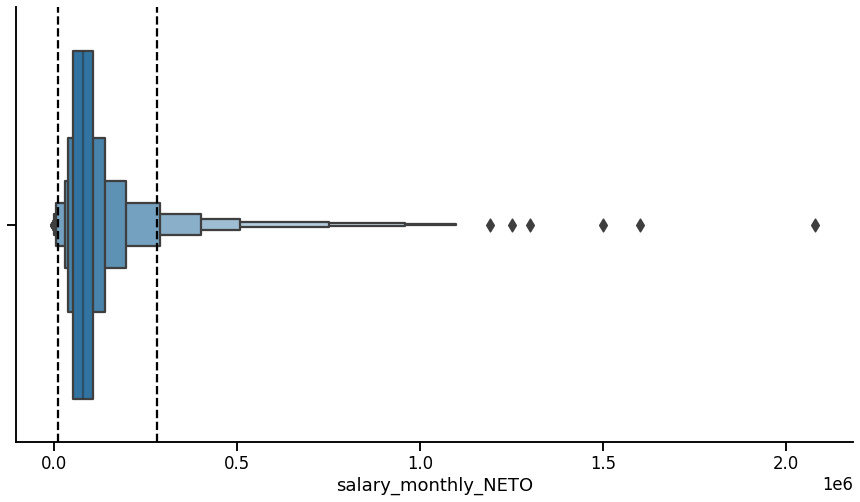

In [ ]:
k = 96.5
limite_max = df_copia['salary_monthly_NETO'].quantile(k / 100)
limite_min = df_copia['salary_monthly_NETO'].quantile((100-k)/100)
print(f'El percentile {k} de la columna salary_monthly_NETO es {limite_max}')
print(f'El percentile {100 - k} de la columna salary_montly_NETO es {limite_min}')

plt.figure(figsize = (15,8))
seaborn.boxenplot(x=df_copia['salary_monthly_NETO'])
plt.axvline(limite_max, c = 'black', linestyle = 'dashed')
plt.axvline(limite_min, c = 'black', linestyle = 'dashed')
seaborn.despine()

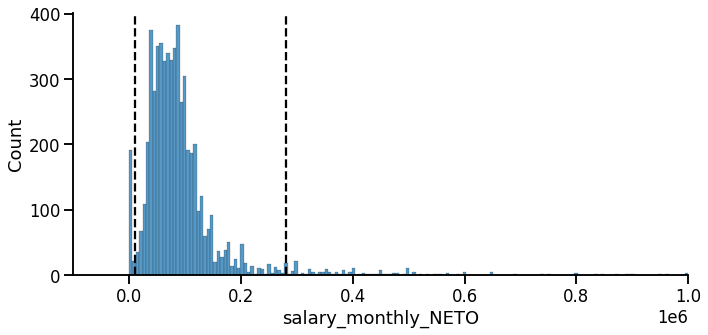

In [ ]:
seaborn.displot(df_copia['salary_monthly_NETO'], aspect = 2)
plt.axvline(limite_max, c = 'black', linestyle = 'dashed')
plt.axvline(limite_min, c = 'black', linestyle = 'dashed')
plt.xlim(left = -0.1e6) # se corre el límite inferior de la gráfica para poder observar bien el corte
plt.xlim(right = 1e6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


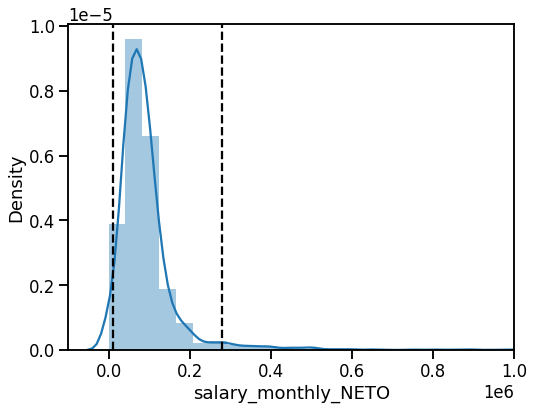

In [ ]:
fig = plt.figure(figsize = (8,6))
seaborn.distplot(df_copia['salary_monthly_NETO'])
plt.xlim(left = -0.1e6) # se corre el límite inferior de la gráfica para poder observar bien el corte
plt.xlim(right = 1e6)
plt.axvline(limite_max, c = 'black', linestyle = 'dashed')
plt.axvline(limite_min, c = 'black', linestyle = 'dashed')
plt.show()

In [ ]:
filtered_salary_neto = df_copia[(df_copia['salary_monthly_NETO'] < limite_max) & (df_copia['salary_monthly_NETO'] > limite_min)] 

Gráfica de la distribución final del salario neto sin anomalías

<Figure size 1080x576 with 0 Axes>

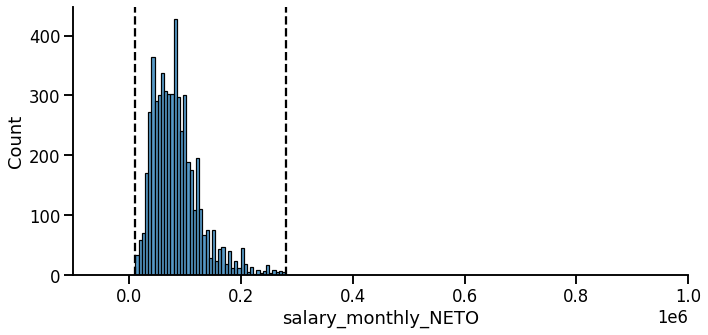

In [ ]:
plt.figure(figsize = (15,8))
seaborn.displot(filtered_salary_neto['salary_monthly_NETO'], aspect = 2)
plt.xlim(left = -0.1e6) # se corre el límite inferior de la gráfica para poder observar bien el corte
plt.xlim(right = 1e6)
plt.axvline(limite_max, c = 'black', linestyle = 'dashed')
plt.axvline(limite_min, c = 'black', linestyle = 'dashed')
plt.show()

<Figure size 1080x576 with 0 Axes>

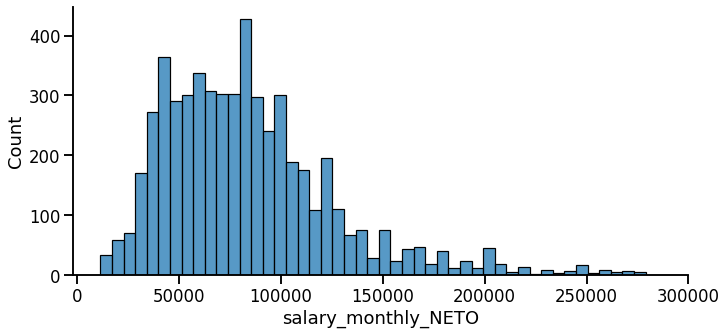

In [ ]:
plt.figure(figsize = (15,8))
seaborn.displot(filtered_salary_neto['salary_monthly_NETO'], aspect = 2)
plt.xlim(right = 0.3e6)
plt.show()

In [ ]:
# Verificación de inexistencia de salarios nulos
filtered_salary_neto['salary_monthly_NETO'].isnull().values.any()

False

#### Eliminación de outliers en 'salary_monthly_BRUTO'

In [ ]:
min_salary_monthly_bruto = filtered_salary_neto['salary_monthly_BRUTO'].min()
max_salary_monthly_bruto = filtered_salary_neto['salary_monthly_BRUTO'].max()
print(f'El salario BRUTO mínimo de los programadores es {min_salary_monthly_bruto}, mientras que el máximo es {max_salary_monthly_bruto}')

El salario BRUTO mínimo de los programadores es 1.0, mientras que el máximo es 2180000.0


Para el caso del salario bruto, se procede a eliminar aquellos valores que sean menores al salario neto. Si son iguales, se considera que la persona no realiza aportes. Para ello se crea una variables nueva que toma el valor del cociente entre el salario NETO y el BRUTO

In [ ]:
filtered_salary_neto['cociente_NETO_BRUTO'] = filtered_salary_neto['salary_monthly_NETO'] / filtered_salary_neto['salary_monthly_BRUTO']
print(filtered_salary_neto['cociente_NETO_BRUTO'])

0       0.811321
1       0.797468
2       0.793750
3       0.784615
4       0.757143
          ...   
6088    0.818116
6089    0.722222
6090    0.979798
6091    0.835294
6094    0.764706
Name: cociente_NETO_BRUTO, Length: 5470, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]), <a list of 8 Text major ticklabel objects>)

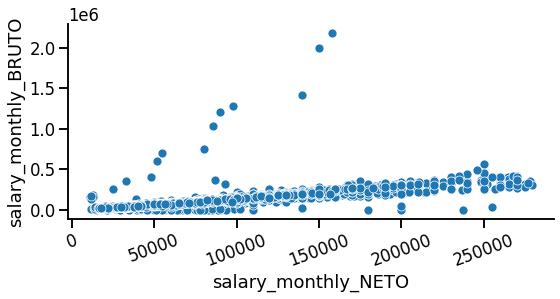

In [ ]:
seaborn.pairplot(data=filtered_salary_neto, y_vars=['salary_monthly_BRUTO'],x_vars=['salary_monthly_NETO'], aspect=2, height=4)
plt.xticks(rotation=20)

Al eliminar los outliers correspondientes a un cociente NETO-BRUTO mayor a la unidad se obtiene lo siguiente

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]), <a list of 8 Text major ticklabel objects>)

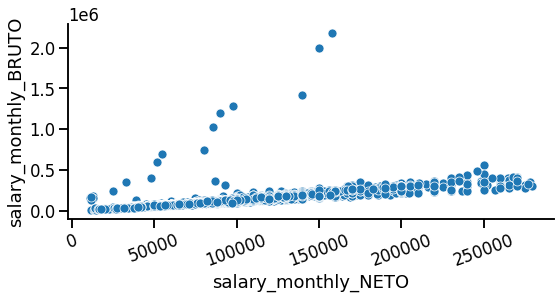

In [ ]:
filtered_salary_bruto = filtered_salary_neto[(filtered_salary_neto['cociente_NETO_BRUTO'] < 1.0) & (filtered_salary_neto['cociente_NETO_BRUTO'] > 0)]
seaborn.pairplot(data=filtered_salary_bruto, y_vars=['salary_monthly_BRUTO'],x_vars=['salary_monthly_NETO'], aspect=2, height=4)
plt.xticks(rotation=20)

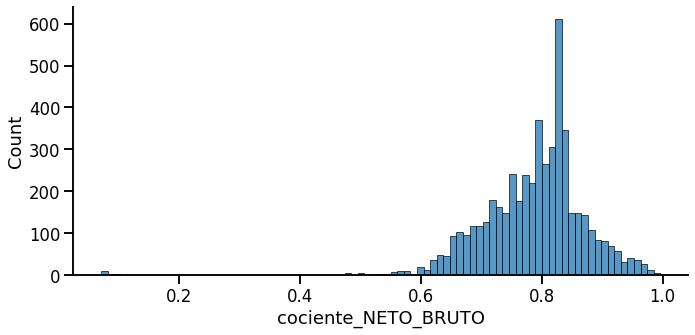

In [ ]:
seaborn.displot(filtered_salary_bruto['cociente_NETO_BRUTO'], aspect = 2)

Se toman como outliers inferiores los valores menores a 0.6 y se los elimina

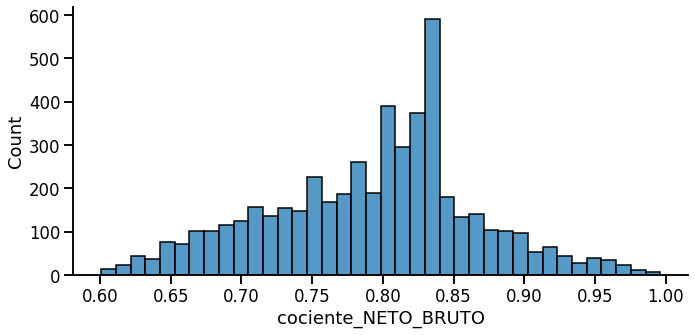

In [ ]:
filtered_df = filtered_salary_bruto[filtered_salary_bruto['cociente_NETO_BRUTO'] > 0.6]
seaborn.displot(filtered_df['cociente_NETO_BRUTO'], aspect = 2)

#### Outliers en 'profile_age'

In [ ]:
min_profile_age = filtered_df['profile_age'].min()
max_profile_age = filtered_df['profile_age'].max()
print(f'La edad mínima de los programadores es {min_profile_age} años, mientras que la máxima es {max_profile_age} años')
filtered_df['profile_age'].unique()

La edad mínima de los programadores es 18 años, mientras que la máxima es 567 años


array([ 26,  29,  22,  39,  32,  25,  33,  23,  40,  35,  34,  45,  42,
        31,  24,  37,  41,  30,  28,  53,  21,  27,  43,  44,  38,  20,
        47,  36,  19,  49,  52,  46,  50,  48,  56,  54,  51,  61,  57,
        67,  55,  18,  58, 567,  65,  59,  60,  64,  62])

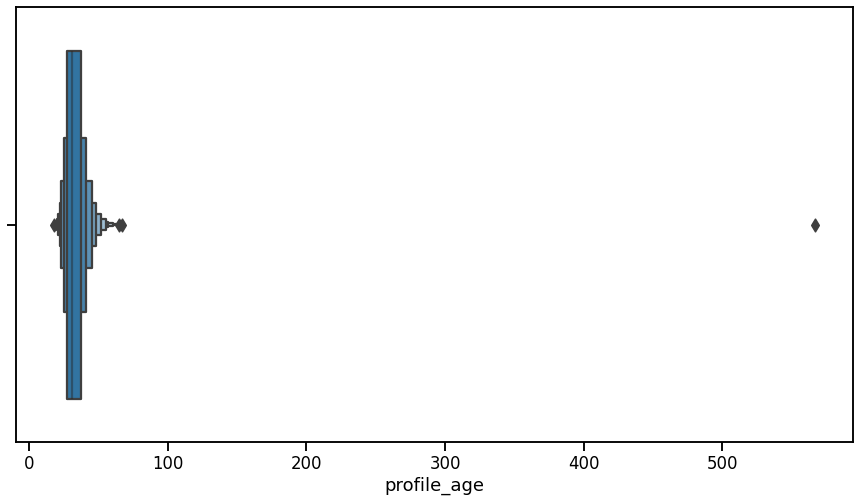

In [ ]:
plt.figure(figsize = (15,8))
seaborn.boxenplot(x=filtered_df['profile_age'])

Para este caso se eliminan anomalias de edad estableciendo un límite superior de 65 años, valor máximo correspondiente a la edad jubilatoria en Argentina.

En relación al límite inferior, se considera la mayoría de edad en Argentina, la cual es de 18 años. El valor mínimo de esta categoría  corresponde a dicha edad, por lo que no es necesario aplicar ningún filtro inferior.  

<Figure size 1080x576 with 0 Axes>

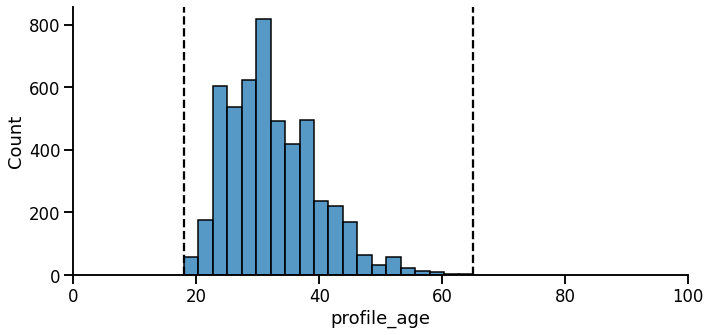

In [ ]:
# Eliminación de anomalías en edades
df = filtered_df[filtered_df['profile_age'] <= 65].copy() # redefino el nombre del dataset
plt.figure(figsize = (15,8))
seaborn.displot(df['profile_age'] , aspect = 2, bins = 20)
plt.xlim(0,100)
plt.axvline(65, color = 'black', linestyle = 'dashed')
plt.axvline(18, color = 'black', linestyle = 'dashed')
plt.show()

### 3. Separación por lenguajes e identificación de lenguajes más populares

In [ ]:
print(f'La longitud del DataFrame filtrado es {len(df)}') # Cantidad final de programadores luego de aplicar los filtros

La longitud del DataFrame filtrado es 5051


In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,profile_age,cured_programming_languages
0,ninguno,Ninguno,43000.0,53000.0,26,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,79000.0,29,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,29,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,29,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,160000.0,22,[ninguno]


In [ ]:
print(f'La longitud del DataFrame extendido es {len(df_lang)}') 

La longitud del DataFrame extendido es 14777


In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
lenguajes_total = language_count['language'].tolist() # lista de todos los lenguajes
total_leguajes = len(language_count)
print(f'La cantidad total de lenguajes de programación es {total_leguajes}')
language_count

La cantidad total de lenguajes de programación es 182


,language,frequency
0,javascript,2023
1,sql,1805
2,html,1491
3,java,1247
4,python,1225
...,...,...
177,adabas,1
178,natural,1
179,arduino,1
180,graphql,1


Se toma el 5.5% supeperior de la lista de todos los lenguajes de programación. Eso corresponde a los 10 lenguajes más populares.

In [ ]:
num = int(total_leguajes*0.055)
print(f'Los {num} lenguajes más populares son: {lenguajes_total[:num]}')
conteo_mas_populares = sum(language_count[:num]['frequency'])# los más populares
conteo_menos_populares = sum(language_count[num:]['frequency'])# los menos populares
print(f'La sumatoria de las frecuencias absolutas de los 10 lenguajes más populares es {conteo_mas_populares}')
print(f'La sumatoria de las frecuencias absolutas de todos los lenguajes restantes es {conteo_menos_populares}')
lenguaje_table = language_count[:num]
lenguaje_table

Los 10 lenguajes más populares son: ['javascript', 'sql', 'html', 'java', 'python', 'css', 'bash/shell', 'php', '.net', 'typescript']
La sumatoria de las frecuencias absolutas de los 10 lenguajes más populares es 11635
La sumatoria de las frecuencias absolutas de todos los lenguajes restantes es 3142


,language,frequency
0,javascript,2023
1,sql,1805
2,html,1491
3,java,1247
4,python,1225
5,css,1001
6,bash/shell,832
7,php,700
8,.net,685
9,typescript,626


In [ ]:
interesting_languages = language_count['language'][:num].tolist() # lista de los lenguajes más populares
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)].copy() # Nuevo DF con los lenguajes más populares
print(f'La longitud del DataFrame extendido con los 10 lenguajes más populares es {len(filtered_df_lang)}')

La longitud del DataFrame extendido con los 10 lenguajes más populares es 11635


Gráfica de barras de los lenguajes más populares (frecuencia absoluta y relativa)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


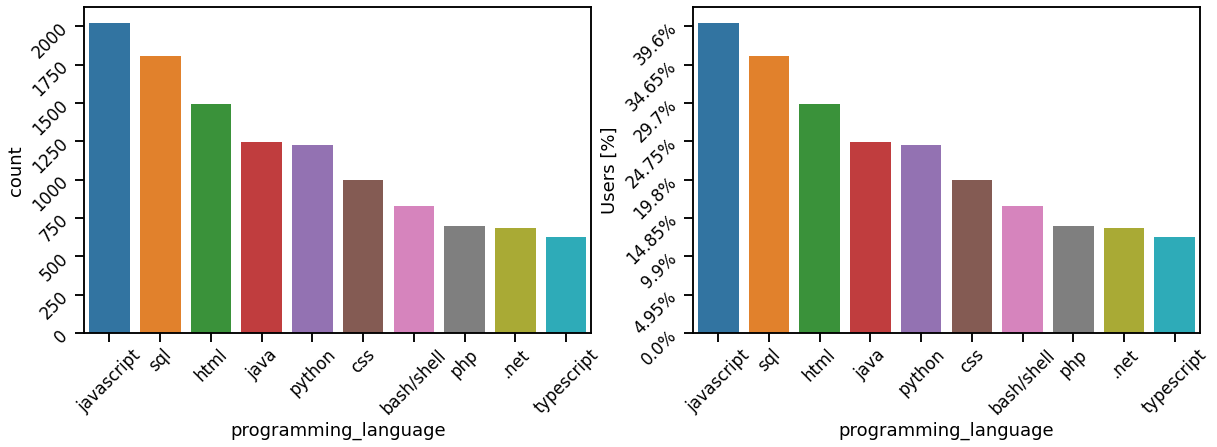

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))
ax = seaborn.countplot(filtered_df_lang.programming_language, order = interesting_languages,ax = axes[0])
plt.ylabel('Fracuencia absoluta')

ax = seaborn.countplot(filtered_df_lang.programming_language,order = interesting_languages,ax = axes[1])

def adjust_y_axis(x, pos):
  total_programadores = len(df)
  fraccion= x / (total_programadores * 1.0)
  return str(round(fraccion*100,2))+'%'

ax.yaxis.set_major_formatter(tick.FuncFormatter(adjust_y_axis))
ax.set_ylabel('Users [%]')

for ax in axes:
  ax.tick_params(labelrotation=45)

A continuación se determina el salario NETO medio a partir del DataFrame sin anomalías

In [ ]:
salario_medio = df['salary_monthly_NETO'].mean()
print(f'El salario NETO medio es {salario_medio:.2f}')

El salario NETO medio es 84300.19


Por curiosidad, se calcula la probabilidad de cobrar más de la media y más de $100.000 o más.


In [ ]:
salary_above_mean = df['salary_monthly_NETO'] >= salario_medio # Teniendo en cuenta todos los lenguajes sin separación
prob_salary_above_mean = len(df[salary_above_mean]) / len(df)
print(f'La probabilidad de cobrar {salario_medio:.2f} o más es {prob_salary_above_mean:.3f}')

La probabilidad de cobrar 84300.19 o más es 0.432


In [ ]:
salary_above_100k = df['salary_monthly_NETO'] >= 100000 # Teniendo en cuenta todos los lenguajes sin separación
prob_salary_above_100k = len(df[salary_above_100k]) / len(df)
print(f'La probabilidad de cobrar $100.000 o más es {prob_salary_above_100k:.3f}')

La probabilidad de cobrar $100.000 o más es 0.290


Probabilidad condicional de cada uno de los lenguajes más populares: dado que el programador sabe uno de los lenguajes más populares, ¿cuál es la probabilidad de que cobre $100.000 o más?

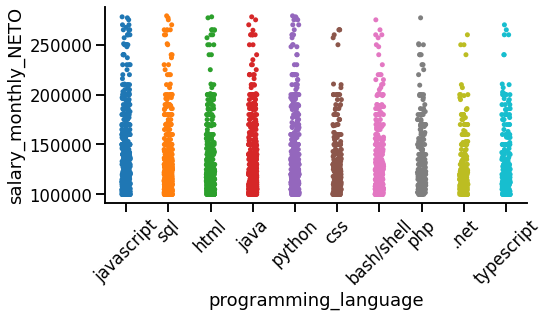

In [ ]:
seaborn.catplot(data=filtered_df_lang[filtered_df_lang['salary_monthly_NETO'] >= 100000],order = interesting_languages, 
                y='salary_monthly_NETO',x='programming_language', height=4, aspect=2)
plt.xticks(rotation = 45)
plt.show()

# Observación: Si bien todos los lenguajes alcanzan aproximadamente la misma altura, es decir, similares salarios netos, no presentan la misma cantidad
# de puntos, siendo unos más "poblados" que otros

In [ ]:
probabilidades_condicionales = []
for lenguaje in interesting_languages:
    interseccion = len(filtered_df_lang[(filtered_df_lang['salary_monthly_NETO'] >= 100000) & (filtered_df_lang['programming_language'] == lenguaje)])
    probabilidades_condicionales.append(interseccion/len(filtered_df_lang[filtered_df_lang['programming_language'] == lenguaje]))
  
prob_condicionales = DataFrame(zip(interesting_languages,probabilidades_condicionales),columns = ['Programming Language', 'Conditional Probability'])
prob_condicionales

,Programming Language,Conditional Probability
0,javascript,0.301038
1,sql,0.277008
2,html,0.245473
3,java,0.380914
4,python,0.371429
5,css,0.250749
6,bash/shell,0.391827
7,php,0.287143
8,.net,0.272993
9,typescript,0.349840


In [ ]:
frecc_rel = []
for frecc_abs in lenguaje_table['frequency']:
  frecc_rel.append(frecc_abs/len(df))

In [ ]:
lenguaje_table['relative frequency'] = frecc_rel
lenguaje_table['Cond. Probability'] = prob_condicionales['Conditional Probability']
lenguaje_table

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,language,frequency,relative frequency,Cond. Probability
0,javascript,2023,0.400515,0.301038
1,sql,1805,0.357355,0.277008
2,html,1491,0.295189,0.245473
3,java,1247,0.246882,0.380914
4,python,1225,0.242526,0.371429
5,css,1001,0.198179,0.250749
6,bash/shell,832,0.164720,0.391827
7,php,700,0.138586,0.287143
8,.net,685,0.135617,0.272993
9,typescript,626,0.123936,0.349840


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


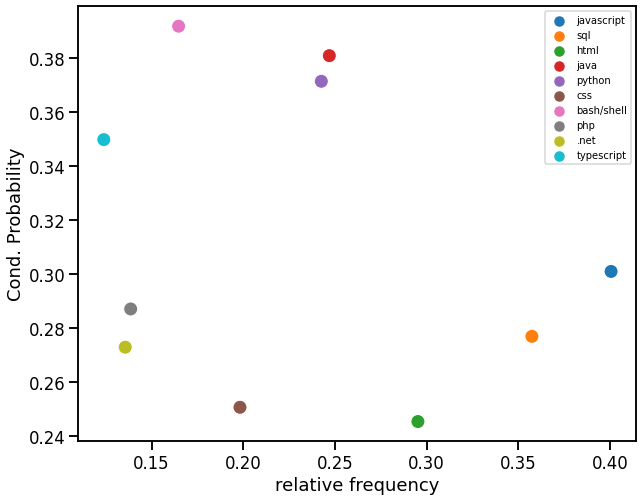

In [ ]:
fig= plt.figure(figsize=(10,8))
seaborn.scatterplot(lenguaje_table['relative frequency'],lenguaje_table['Cond. Probability'],hue = lenguaje_table['language'], s = 200)
plt.legend(loc = 'upper right',prop={'size': 10})

### Conclusión
De los 10 lenguajes más populares, Bash/Shell, Java y Python son los que están asociados a los salarios netos más altos, entendidos como aquellos que superan los 100.000 pesos. De estos tres, Bash/Shell es el que más resalta en el sentido que si bien no es un lenguaje muy popular (tiene baja frecuencia relativa), aquellos programadores que lo usan tienen la probabilidad más alta de cobrar más de 100.000 pesos.